# **Bankruptcy Prediction Model**

### Import Libraries

In [194]:
# Data Manipulation
import pandas as pd 
pd.options.display.float_format = '{:.2f}'.format
import numpy as np

# Data Visualisation
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid",color_codes=True)

# Modelling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
import scipy.stats as stats

# Evaluation
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report

### Load and Explore Data

In [195]:
# Load data
df = pd.read_csv('data/bankruptcy-companies.csv')

df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.37,0.42,0.41,0.60,0.60,1.00,0.80,0.81,0.30,...,0.72,0.01,0.62,0.60,0.83,0.29,0.03,0.56,1,0.02
1,1,0.46,0.54,0.52,0.61,0.61,1.00,0.80,0.81,0.30,...,0.80,0.01,0.62,0.61,0.84,0.28,0.26,0.57,1,0.02
2,1,0.43,0.50,0.47,0.60,0.60,1.00,0.80,0.81,0.30,...,0.77,0.04,0.62,0.60,0.84,0.29,0.03,0.56,1,0.02
3,1,0.40,0.45,0.46,0.58,0.58,1.00,0.80,0.81,0.30,...,0.74,0.00,0.62,0.58,0.83,0.28,0.03,0.56,1,0.02
4,1,0.47,0.54,0.52,0.60,0.60,1.00,0.80,0.81,0.30,...,0.80,0.00,0.62,0.60,0.84,0.28,0.02,0.58,1,0.04


In [196]:
# Check data info
print("Dataset Shape:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nSummary Statistics:")
print(df.describe())

Dataset Shape: (6819, 96)

Columns: ['Bankrupt?', ' ROA(C) before interest and depreciation before interest', ' ROA(A) before interest and % after tax', ' ROA(B) before interest and depreciation after tax', ' Operating Gross Margin', ' Realized Sales Gross Margin', ' Operating Profit Rate', ' Pre-tax net Interest Rate', ' After-tax net Interest Rate', ' Non-industry income and expenditure/revenue', ' Continuous interest rate (after tax)', ' Operating Expense Rate', ' Research and development expense rate', ' Cash flow rate', ' Interest-bearing debt interest rate', ' Tax rate (A)', ' Net Value Per Share (B)', ' Net Value Per Share (A)', ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons', ' Cash Flow Per Share', ' Revenue Per Share (Yuan ¥)', ' Operating Profit Per Share (Yuan ¥)', ' Per Share Net profit before tax (Yuan ¥)', ' Realized Sales Gross Profit Growth Rate', ' Operating Profit Growth Rate', ' After-tax Net Profit Growth Rate', ' Regular Net Profit Growth Ra

In [197]:
# Summary Stats by Status
df.groupby('Bankrupt?').mean()

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
Bankrupt?,,,,,,,,,,,,,,,,,,,,,
0,0.51,0.56,0.56,0.61,0.61,1.00,0.80,0.81,0.30,0.78,...,0.81,16216699.51,0.62,0.61,0.84,0.28,0.03,0.57,1.00,0.05
1,0.42,0.46,0.46,0.60,0.60,1.00,0.80,0.81,0.30,0.78,...,0.74,91000000.01,0.62,0.60,0.83,0.29,0.03,0.56,1.00,0.02


<Axes: >

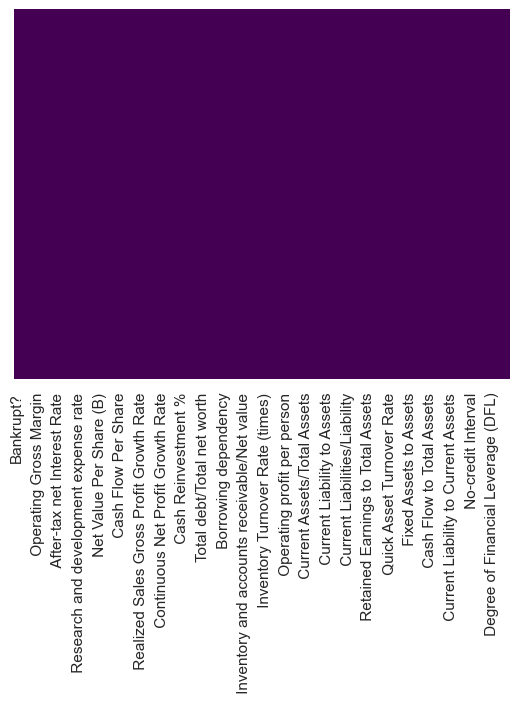

In [198]:
# Create heatmap showing missing values in dataset
sns.heatmap(
    df.isnull(), # Boolean matrix of missing (True) vs present (False) values
    yticklabels=False, # Hide row labels for cleaner visualization 
    cbar=False, # Remove colorbar legend
    cmap='viridis' # Use viridis colormap (yellow=missing, purple=present)
)

### Data Distribution Analysis

/var/folders/k5/x4_mk1jj0ng18qvwc85rby140000gn/T/ipykernel_94280/4226053942.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


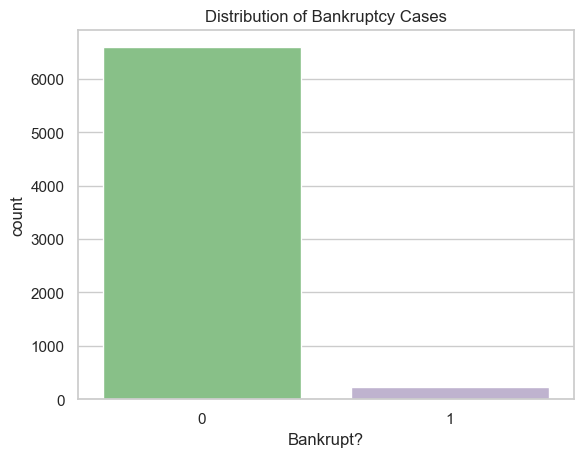

In [199]:
# Visualise distribution of bankrupt vs non-bankrupt companies
sns.countplot(
    x='Bankrupt?', # Binary target variable (0=not bankrupt, 1=bankrupt)
    data=df,
    palette='Accent'
)
plt.title('Distribution of Bankruptcy Cases')
plt.show()

Most of this data contains entries of those who are **NOT** bankrupt. It is key to note this might mean our model(s) will be better at predicting that.

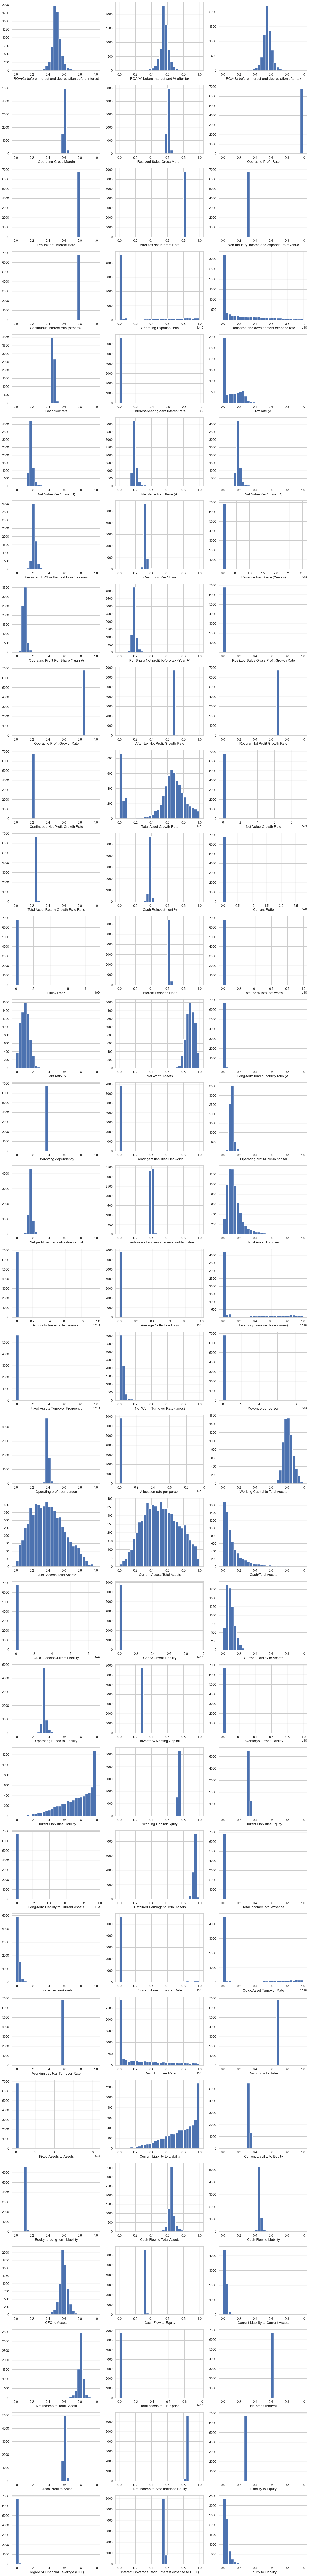

In [200]:
# Function to create histogram subplots for numeric columns

def plot_histograms(df, figsize=(15,4)):
    
    num_cols  = df.select_dtypes(exclude=['int']).columns # Get numeric columns

    n_columns = 3 # Number of columns in subplot grid
    n_rows = (len(num_cols) + n_columns - 1)// n_columns # Calculate needed rows

    fig = plt.figure(figsize=(figsize[0], figsize[1] * n_rows)) # Create figure with dynamic size

    for i, col in enumerate(num_cols, 1): # Create subplot for each numeric column
        plt.subplot(n_rows, n_columns, i)
        plt.hist(df[col], bins=30) # Plot histogram with 30 bins
        plt.xlabel(col)

    plt.tight_layout() # Adjust spacing between subplots


# Use
plot_histograms(df)

<Axes: >

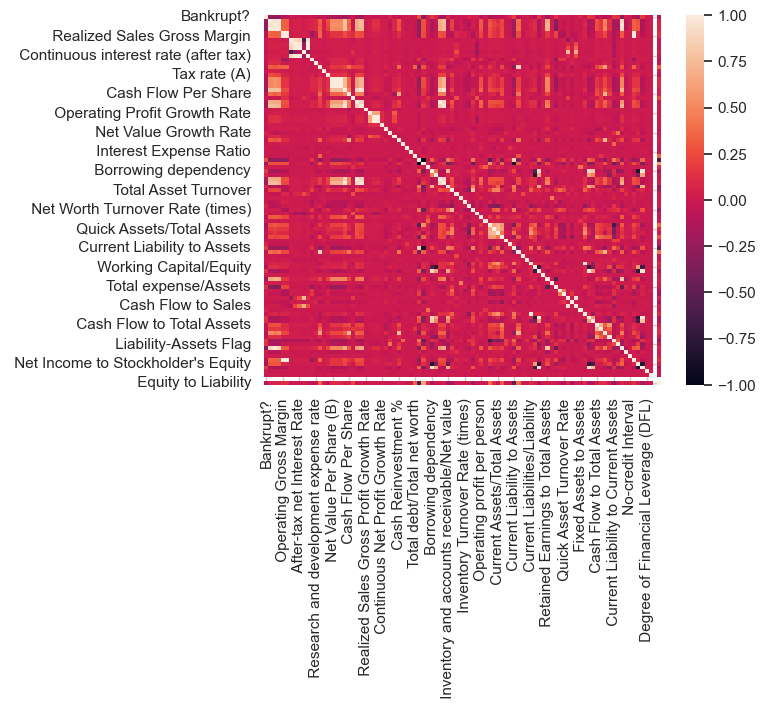

In [201]:
# Correlation Analysis
sns.heatmap(df.corr())

### Logistic Regression Model (1)

In [202]:
# Separate features and target variable
x = df.drop(['Bankrupt?'], axis='columns') # Remove target column to create feature matrix
y = df['Bankrupt?'] # Note this is binary target variable

In [203]:
# Split data into train and test sets
x_tr, x_ts, y_tr, y_ts = train_test_split(
    x, y, # Features (x) and target (y)
    test_size=0.2, # Use 20% for testing
    random_state=100, # Set seed for reproducibility
    stratify=y # Maintain same ratio of target classes
)

In [204]:
# Fit logistic regression model using statsmodels
mdl = sm.GLM(
    y_tr, # Training target variable
    sm.add_constant(x_tr), # Add intercept term to training features
    family=sm.families.Binomial() # Specify logistic regression model
)
mdl.fit().summary() # Fit model and display regression statistics

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/family.py:1056: RuntimeWarning: divide by zero encountered in log
  special.gammaln(n - y + 1) + y * np.log(mu / (1 - mu + 1e-20)) +
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/family.py:1056: RuntimeWarning: invalid value encountered in multiply
  special.gammaln(n - y + 1) + y * np.log(mu / (1 - mu + 1e-20)) +


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Bankrupt?   No. Observations:                 5455
Model:                            GLM   Df Residuals:                     5392
Model Family:                Binomial   Df Model:                           62
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 27 Jan 2025   Deviance:                       18881.
Time:                        12:43:50   Pearson chi2:                 9.23e+17
No. Iterations:                   100   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
============================================================================================================================
                                                               coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------
 ROA(C) before interest and depreciation before interest -1.569e+15   1.27e+08  -1.23e+07      0.000   -1.57e+15   -1.57e+15
 ROA(A) before interest and % after tax                   1.913e+15   9.57e+07      2e+07      0.000    1.91e+15    1.91e+15
 ROA(B) before interest and depreciation after tax        3.719e+14   1.56e+08   2.39e+06      0.000    3.72e+14    3.72e+14
 Operating Gross Margin                                  -3.986e+14   1.07e+09  -3.71e+05      0.000   -3.99e+14   -3.99e+14
 Realized Sales Gross Margin                              2.191e+15   2.15e+09   1.02e+06      0.000    2.19e+15    2.19e+15
 Operating Profit Rate                                    1.047e+17   9.56e+08   1.09e+08      0.000    1.05e+17    1.05e+17
 Pre-tax net Interest Rate                                 1.66e+17   1.56e+09   1.07e+08      0.000    1.66e+17    1.66e+17
 After-tax net Interest Rate                             -3.005e+17   4.54e+09  -6.62e+07      0.000   -3.01e+17   -3.01e+17
 Non-industry income and expenditure/revenue              2.287e+16   3.45e+08   6.62e+07      0.000    2.29e+16    2.29e+16
 Continuous interest rate (after tax)                     5.501e+16   4.23e+09    1.3e+07      0.000     5.5e+16     5.5e+16
 Operating Expense Rate                                    313.0745      0.000    9.8e+05      0.000     313.074     313.075
 Research and development expense rate                    1.566e+04      0.000   4.29e+07      0.000    1.57e+04    1.57e+04
 Cash flow rate                                          -6.182e+15   1.43e+08  -4.31e+07      0.000   -6.18e+15   -6.18e+15
 Interest-bearing debt interest rate                      3.241e+04      0.009   3.78e+06      0.000    3.24e+04    3.24e+04
 Tax rate (A)                                             1.164e+14   7.52e+06   1.55e+07      0.000    1.16e+14    1.16e+14
 Net Value Per Share (B)                                 -2.692e+16   6.99e+08  -3.85e+07      0.000   -2.69e+16   -2.69e+16
 Net Value Per Share (A)                                  1.138e+17   1.61e+09   7.06e+07      0.000    1.14e+17    1.14e+17
 Net Value Per Share (C)                                 -9.104e+16   1.45e+09  -6.26e+07      0.000    -9.1e+16    -9.1e+16
 Persistent EPS in the Last Four Seasons                 -5.956e+15   1.71e+08  -3.48e+07      0.000   -5.96e+15   -5.96e+15
 Cash Flow Per Share                                     -6.531e+14   1.04e+08  -6.28e+06      0.000   -6.53e+14   -6.53e+14
 Revenue Per Share (Yuan ¥)                               -2.58e+06      0.166  -1.55e+07      0.000   -2.58e+06   -2.58e+06
 Operating Profit Per Share (Yuan ¥)                      8.725e+15   9.52e+08   9.

In [205]:
# Generate predictions using fitted model
modelpredictions = mdl.fit().predict(x_ts)

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


### Model Evaluation

What our model summary indicates is that the biggest determinants, with high sttaistical significance, of Bankruptcy are :
- Pre-tax net Interest Rate (**Stong +ve**)
- Operating Profit Rate (**Stong +ve**)
- Total income/Total expense (**Stong +ve**)
- After-tax net Interest Rate (**Stong -ve**)
- Net Value Per Share (A) (**Stong +ve**)
- Net Value Per Share (C) (**Stong +ve**)
- Regular Net Profit Growth Rate (**Stong +ve**)
- After-tax Net Profit Growth Rate (**Stong +ve**)
- Working capital Turnover Rate (**Stong +ve**)
- Cash Flow to Sales (**Stong +ve**)

The model appears to focus heavily on interest rates, profitability metrics, and cash flow indicators as key predictors of bankruptcy risk. 

In [206]:
# Generate and display confusion matrix
cm = confusion_matrix(y_ts, modelpredictions) # Compare true vs predicted values
cm

array([[1289,   31],
       [  30,   14]])

<Axes: >

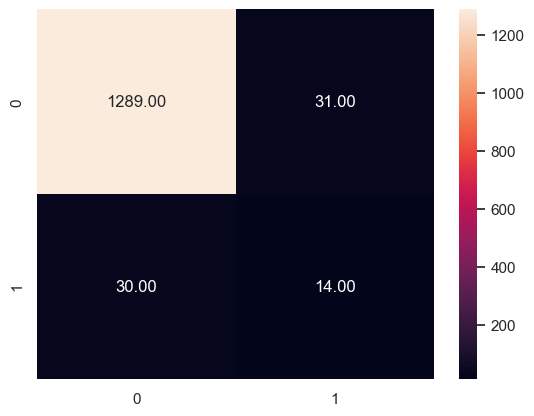

In [207]:
# Visualise confusion matrix as heatmap
sns.heatmap(
    cm, 
    annot=True,
    fmt='.2f' # Format numbers to 2 decimal places
)

In [208]:
print(classification_report(y_ts, modelpredictions))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1320
           1       0.31      0.32      0.31        44

    accuracy                           0.96      1364
   macro avg       0.64      0.65      0.65      1364
weighted avg       0.96      0.96      0.96      1364



### So far..

We cannot depend on accuracy to evaluate the model because the other metrics being low indicate an imbalanced model. To put it simply, recall stresses "how many actual positives were captured," whereas precision focuses on "how many predicted positives are truly positive."(Nath, 2023).

**NOTE**: *Precision is important when false positives are costly and Recall is important in scenarios where false negatives are costly. In this case, we need the model to predict as correctly as possible because both are costly.* 

**Key Findings**:
Model can predict healthy companies excellently but struggles to identify bankruptcies due to class imbalances. The low F1 score (0.31) indicates model needs to improve minority class detection.

### Logistic Regression Model (2)

In [209]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE oversampling to handle class imbalance
smote = SMOTE(random_state=42) # Initialise SMOTE 
X_resampled, y_resampled = smote.fit_resample(x_tr, y_tr)

In [210]:
# Fit logistic regression on SMOTE-balanced data
mdl2 = sm.GLM(
    y_resampled, # Balanced target variable
    sm.add_constant(X_resampled), # Add intercept to balanced features
    family=sm.families.Binomial() # Logistic regression model
)

mdl2.fit().summary() # Model statistics

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/family.py:1056: RuntimeWarning: divide by zero encountered in log
  special.gammaln(n - y + 1) + y * np.log(mu / (1 - mu + 1e-20)) +
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/family.py:1056: RuntimeWarning: invalid value encountered in multiply
  special.gammaln(n - y + 1) + y * np.log(mu / (1 - mu + 1e-20)) +


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Bankrupt?   No. Observations:                10558
Model:                            GLM   Df Residuals:                    10509
Model Family:                Binomial   Df Model:                           48
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 27 Jan 2025   Deviance:                   1.2894e+05
Time:                        12:43:57   Pearson chi2:                 6.31e+18
No. Iterations:                   100   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
============================================================================================================================
                                                               coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------
 ROA(C) before interest and depreciation before interest -4.865e+15   8.95e+07  -5.44e+07      0.000   -4.87e+15   -4.87e+15
 ROA(A) before interest and % after tax                  -9.485e+14   6.75e+07  -1.41e+07      0.000   -9.49e+14   -9.49e+14
 ROA(B) before interest and depreciation after tax        3.664e+15   1.16e+08   3.17e+07      0.000    3.66e+15    3.66e+15
 Operating Gross Margin                                    2.89e+16   8.76e+08    3.3e+07      0.000    2.89e+16    2.89e+16
 Realized Sales Gross Margin                             -5.801e+16   1.76e+09  -3.31e+07      0.000    -5.8e+16    -5.8e+16
 Operating Profit Rate                                    1.718e+17   8.14e+08   2.11e+08      0.000    1.72e+17    1.72e+17
 Pre-tax net Interest Rate                                2.846e+17   1.32e+09   2.16e+08      0.000    2.85e+17    2.85e+17
 After-tax net Interest Rate                             -4.895e+17   3.88e+09  -1.26e+08      0.000   -4.89e+17   -4.89e+17
 Non-industry income and expenditure/revenue              4.357e+16   2.73e+08   1.59e+08      0.000    4.36e+16    4.36e+16
 Continuous interest rate (after tax)                     5.562e+16   3.48e+09    1.6e+07      0.000    5.56e+16    5.56e+16
 Operating Expense Rate                                   6761.6189      0.000   2.78e+07      0.000    6761.618    6761.619
 Research and development expense rate                    4.102e+04      0.000   1.44e+08      0.000     4.1e+04     4.1e+04
 Cash flow rate                                          -8.422e+15   1.32e+08  -6.37e+07      0.000   -8.42e+15   -8.42e+15
 Interest-bearing debt interest rate                      3.748e+05      0.008    4.5e+07      0.000    3.75e+05    3.75e+05
 Tax rate (A)                                              2.11e+14   6.03e+06    3.5e+07      0.000    2.11e+14    2.11e+14
 Net Value Per Share (B)                                 -5.071e+16    5.9e+08   -8.6e+07      0.000   -5.07e+16   -5.07e+16
 Net Value Per Share (A)                                  3.115e+16   9.37e+08   3.33e+07      0.000    3.12e+16    3.12e+16
 Net Value Per Share (C)                                   1.61e+16   7.28e+08   2.21e+07      0.000    1.61e+16    1.61e+16
 Persistent EPS in the Last Four Seasons                 -1.672e+16   1.47e+08  -1.13e+08      0.000   -1.67e+16   -1.67e+16
 Cash Flow Per Share                                     -1.017e+15   8.16e+07  -1.25e+07      0.000   -1.02e+15   -1.02e+15
 Revenue Per Share (Yuan ¥)                                 2.5e+06      0.137   1.82e+07      0.000     2.5e+06     2.5e+06
 Operating Profit Per Share (Yuan ¥)                      4.868e+16   8.47e+08   5.

In [211]:
# Generate predictions using fitted model
y_pred = mdl2.fit().predict(X_resampled)

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


In [212]:
# Generate and display confusion matrix
cm2 = confusion_matrix(y_resampled, y_pred)
cm2

array([[3958, 1321],
       [  79, 5200]])

<Axes: >

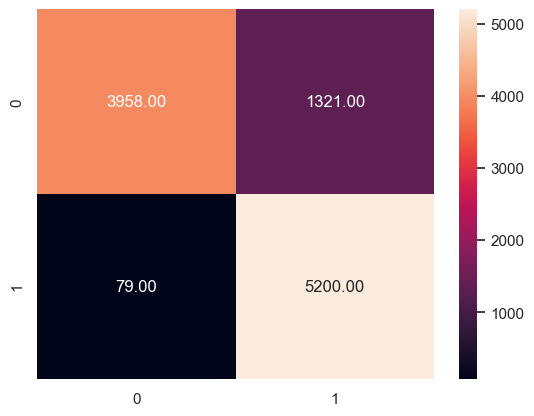

In [213]:
# Visualise confusion matrix as heatmap
sns.heatmap(
    cm2, 
    annot=True, 
    fmt='.2f'
)

In [214]:
print(classification_report(y_resampled,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.75      0.85      5279
           1       0.80      0.99      0.88      5279

    accuracy                           0.87     10558
   macro avg       0.89      0.87      0.87     10558
weighted avg       0.89      0.87      0.87     10558



### Feature Importance Analysis

In [ ]:
model_fit = mdl2.fit()  # Save fitted model first
coef_df = pd.DataFrame({
    'Feature': X_resampled.columns,
    'Coefficient': model_fit.params
}).iloc[1:]
coef_df = coef_df.sort_values('Coefficient', key=abs, ascending=False)

# Print sizes to debug
print("X_resampled columns:", len(X_resampled.columns))
print("model_fit.params length:", len(model_fit.params))

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


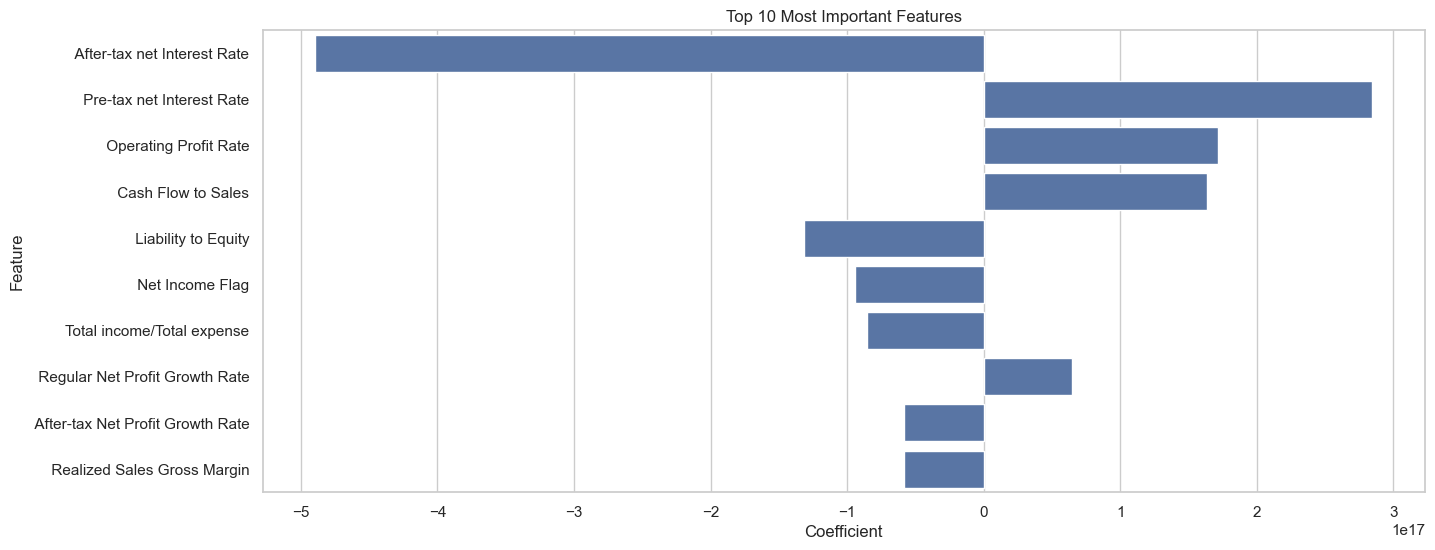

In [217]:
# Plot top 10 features
plt.figure(figsize=(15, 6))
sns.barplot(data=coef_df.head(10), x='Coefficient', y='Feature')
plt.title('Top 10 Most Important Features')
plt.show()

### Conclusions

Key findings:
1. Initial model showed high accuracy but poor performance on bankruptcy prediction
2. SMOTE balancing significantly improved bankruptcy prediction
3. Most important predictors are interest rates and profitability metrics
4. Model achieves 87% accuracy with balanced performance across classes